In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
def smooth_image_with_gaussian(image ,kernel_size = 7):
  out = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
  return out
 

In [3]:
def get_edges_with_canny(image,low = 100,high = 150):
  out = cv2.Canny(image, low, high)
  return out
  

In [5]:
def create_mask_for_image(image_color , edges):
  mask = np.zeros_like(edges)

  three_points = np.array([[(0, image_color.shape[0]), ((image_color.shape[1]/2), (image_color.shape[0]/2) ), (image_color.shape[1], image_color.shape[0])]]).astype("int32")
  cv2.fillPoly(mask, three_points, 255)
  
  out = cv2.bitwise_and(edges, mask)
  return out,mask
  

In [6]:
def hough_lines(image, rho = 3, theta = np.pi / 180, threshold = 20, min_line_len = 150, max_line_gap = 37):
  lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
  return lines

In [7]:
def draw_lines_all(img, lines, color=[255, 0, 0], thickness=7):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

In [17]:
def merge_lines_with_mean(image ,  lines,color=[255, 0, 0], thickness=7):
    down_road = 1280
    top_road = 910

    down_p = []
    up_p = []
    down_n = []
    up_n = []
    
    down_slope =0.5
    up_slope = 0.8

    for line in lines:
        for x1,y1,x2,y2 in line:
            slope = (y2-y1)/(x2-x1)
            b = y1 - slope*x1
            if slope > down_slope and slope < up_slope:
                down_p.append((down_road - b)/slope)
                up_p.append((top_road - b)/slope)
                                      
            elif slope < (-1 * down_slope) and slope > (-1 * up_slope):
                down_n.append((down_road - b)/slope)
                up_n.append((top_road - b)/slope)

    output = np.array([[int(np.mean(down_p)), int(np.mean(down_road)), int(np.mean(up_p)), int(np.mean(top_road))], [int(np.mean(down_n)), int(np.mean(down_road)), int(np.mean(up_n)), int(np.mean(top_road))]])
    for i in range(len(output)):
        cv2.line(image, (output[i, 0], output[i, 1]), (output[i, 2], output[i, 3]), color, thickness)


In [18]:
def find_road(image_color, show_middle_outputs=False):
  grayscale = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
  plt.imshow(grayscale,cmap="gray")
  plt.show()
  blur = smooth_image_with_gaussian(grayscale,kernel_size = 7)
  if show_middle_outputs:
    plt.imshow(blur,cmap="gray")
    plt.show()

  edges = get_edges_with_canny(blur,low = 100,high = 150)
  if show_middle_outputs:
    plt.imshow(edges,cmap="gray")
    plt.show()

  masked_edges,mask = create_mask_for_image(image_color , edges)
  if show_middle_outputs:
    plt.imshow(mask,cmap="gray")
    plt.show()
    plt.imshow(masked_edges,cmap="gray")
    plt.show()

  output = copy.deepcopy(image_color)
  output_2 = copy.deepcopy(image_color)

  lines_all = hough_lines(masked_edges)
  draw_lines_all(output,lines_all,color=[255, 255, 0], thickness=7)
  if show_middle_outputs:
    plt.imshow(output)
    plt.show()

  merge_lines_with_mean(output_2,lines_all,color=[255, 255, 0], thickness=7)
  if show_middle_outputs:
    plt.imshow(output_2)
    plt.show()
  return output_2

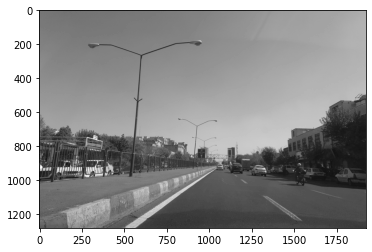

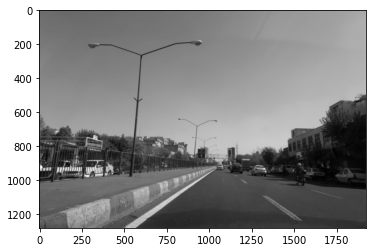

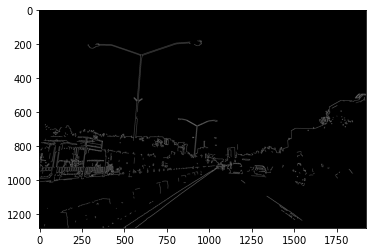

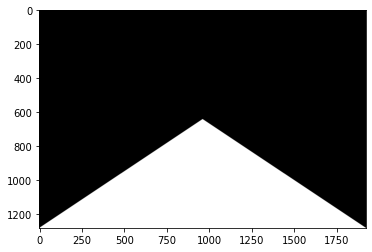

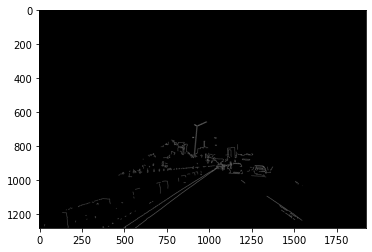

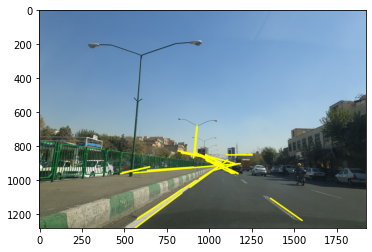

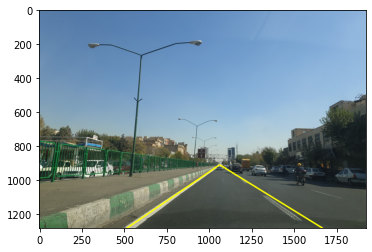

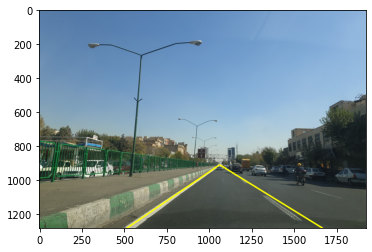

In [19]:
image_color = cv2.imread("/content/drive/MyDrive/MV/HW2/Inputs/img1.jpg")
image_color = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
output = find_road(image_color, show_middle_outputs=True)
plt.imshow(output)
plt.show()